#Python Packages

#Tracks:

Erin: Political Science

Rachel: Psychology

Karoline: Economics

Hayley: Psychology

**Karoline:**

In my previous internship, one of my responsibilities was to build weekly data reports for clients. After a few weeks, I realized that I could use Python to automate various tasks such as copying & pasting Excel data and creating & formatting pivot tables. After creating my Python script, I could finish what used to be hours of manual work for many reports each week with a quick run of the Python script.

When I create a report, I first have to extract updated data each week from the database and put it in a new csv file. Then, I need to copy that new data and paste it in a template file for the client. I can't provide the company files so the code below cannot run, but I added it below to illustrate how I used the Python package openpyxl to complete this task. Openpyxl is a useful Python library used to read or write Excel 2010 xlsx/xlsm/xltx/xltm files.

In [0]:
import pandas as pd
read_file = pd.read_csv ('Report_formatted.csv')
read_file.style.format({"Total FB Minimum": "${:20,.0f}", "Estimated Total Charges": "${:20,.0f}"})
read_file.to_excel ('Report_formatted.xlsx', index = None, header=True)
 
import openpyxl
#Delete rows in template file
excel_file = openpyxl.load_workbook('Client_Report.xlsm')
excel_sheet = excel_file['Data']
allrows = excel_sheet.max_row
excel_sheet.delete_rows(idx=2, amount= allrows)
excel_file.save('Report_formatted.xlsm')
#File to be copied
wb = openpyxl.load_workbook("Report_formatted.xlsx")
sheet = wb["Sheet1"]
 
#File to be pasted into
template = openpyxl.load_workbook("Client_Report.xlsm")
temp_sheet = template["Data"]
 
#Copy range of cells to put into template file
def copyRange(startCol, startRow, endCol, endRow, sheet):
   rangeSelected = []
   #Loops through selected Rows
   for i in range(startRow,endRow + 1,1):
       #Appends the row to a RowSelected list
       rowSelected = []
       for j in range(startCol,endCol+1,1):
           rowSelected.append(sheet.cell(row = i, column = j).value)
       #Adds the RowSelected List and nests inside the rangeSelected
       rangeSelected.append(rowSelected)
      
   return rangeSelected
 
#Paste data from copyRange into template sheet
def pasteRange(startCol, startRow, endCol, endRow, sheetReceiving,copiedData):
   countRow = 0
   for i in range(startRow,endRow+1,1):
       countCol = 0
       for j in range(startCol,endCol+1,1):
           sheetReceiving.cell(row = i, column = j).value = copiedData[countRow][countCol]
           countCol += 1
       countRow += 1
 
def createData():
   print("Processing...")
   allrows2 = sheet.max_row
   allcolumns = sheet.max_column
   selectedRange = copyRange(1,2,allcolumns,allrows2,sheet)
   pastingRange = pasteRange(1,2,allcolumns,allrows2,temp_sheet,selectedRange)
   template.save("Client_Report.xlsm")
   print("Range copied and pasted!")
 
createData()

**Rachel:**

As someone on the Psychology substantive track for QTM, I constantly find myself surronded by academic studies, research experiments, and a vast quantity of data that needs to be sorted, labeled, and analyzed. Both in class and working on research projects in a lab, I have experienced the high demand and need to find a way to streamline data both categorically and numerically in a way that preserves the integrity of the entire report received. For this, I am drawn to Python as it is an incredibly readable and expressive language and rather intuitive. So, to try out a package that would help me further my research skills for psychology I thought it would be interesting to try out some of these python commands. Even a command like "newspaper3k" would have incredible functionality for someone with a psychology specialization. This command essentially allows you to retrieve news articles and associated meta-data from a wide selection of international publications. From this command, one can retrieve images, text snippets, and author names. The command even has some NLP functionality (natural language properties) mean that with this command, one could parse out specific phrases or words of interest that a researcher might want to use. It would save much time in contrast to having to parse through all of the data manually. 

In [0]:
!pip3 install newspaper3k

     |████████████████████████████████| 215kB 4.6MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 7.4MB 45.4MB/s 
     |████████████████████████████████| 194kB 46.8MB/s 
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp36-none-any.whl size=3357 sha256=c78e4f46b16e96f2c1d4799d0791f0264e0c2d5f3aa4538944dc6c87e66675a8
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c7575424cfd3340f40ed
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp36-none-any.whl size=7398406 sha256=64de79aeaf4e5a2bfd83ce5641f48dacb23db48b25f59bf72fb97acc095b716d
  Stored in directory: /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35da20627c013f438ed34
  Created wheel for feedparser: filename=feedparser-5.2.1-cp36-none-any.whl size=44940 sha256=671cfb35bbbac9c442245c876d441ee6f619b7e6b87c193cb3a4d4c713455038
  Stored in directory: /root/.cache/pip/wheels/8c/69/b7/f52763c41c5471df57703a0ef718a32a5e

In [0]:
from newspaper import Article

In [0]:
url = 'https://www.reuters.com/article/us-health-coronavirus-wellcome/global-health-fund-calls-for-8-billion-to-begin-covid-19-exit-strategy-idUSKBN21P1GQ'

In [0]:
a = Article(url)

In [0]:
a.download()

In [0]:
a.parse()

In [0]:
print(a.text[:150])

LONDON (Reuters) - A leading global health fund has asked international businesses and governments to provide $8 billion to support development and pr


In [0]:
print(a.title)

Global health fund calls for $8 billion to begin COVID-19 exit strategy


In the above code cells I have written a brief example of how the command newspaper3k might work in Jupyter notebooks and just how useful it can be when given an even greater task. I used to command to show part of its complete functionality. I downloaded the article using python, parsed and printed a line including the first 150 characters by using the print(a.text[:150]) command. While this is not a psychology article, the same technique applies. I also used the package to print the title of the article that I was looking at. This same command could be used to parse much more thoroughly to find a specific result of a research study that I was looking at, just as an example.
 
 My experience trying this new command was quite fun and interesting. It reiterated to me the cohesive and readable nature of Python. I also utilized many web sources that talked about the command and its functionality to support me along the way. Because Python is so popular and user-friendly, it was a positive experience overall. It also gave me an idea to apply this command as a preliminary research method to all my work when searching for articles and information of interest. It also inspired me to venture out and explore more Python commands to help me with my goals. It can sometimes be daunting to incorporate new code and technological methods into my research. I think that a lot of times, we become wrapped in our research/substantive track and forget to utilize the resources and technology that we have at our disposal. Next time, I will more readily use and explore different Python commands (etc) to improve my skills as a researcher. I encourage others to try the same!

**Hayley:**

As a research assistant in an animal psychology lab, I have learned that Python is a great tool to accomplish several kinds of programming tasks. Using only Python packages, my lab has been able to create computerized cognitive experiments, collect and store data, and analyze and visualize results. One type of experiment often employed in my lab involves categorization tasks with monkeys. For example, a random image will appear on a touch screen, followed by two side-by-side squares representing two arbitrary categories. The monkey will then have to determine if the image belongs to the category on the left or right and tap on the corresponding square.

In all experiments, it is important to make sure you are actually testing what you are aiming to test. This is especially difficult when working with animal cognition since you can't explain to the monkeys what the task is for or how to complete it. One small step I can take to check that the experiment is going as planned is to look at which squares are being selected by a monkey for each trial of the experiment. If the monkeys are continuously selecting a square on only one side, it indicates that they are learning the task incorrectly. This behavior is easily visualized using a specific type of graph, which I can create with the Seaborn package. Although it builds off of Matplotlib, Seaborn has many more features and graphing options, and, in my opinion, creates graphs that are easier to interpret. It is also very easy to use with other packages like Pandas.

In [0]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


As Karoline has shown, Pandas is very useful and intuitive for creating and working with data frames. Below, I made a sample Pandas data frame to use for my graph. There are ten consecutive trials for each of the six monkeys in the lab. For each trial, a monkey selects a screen position of either 0 (left) or 1 (right).

In [0]:
# make sample data using randomization
pos = np.random.randint(2, size = 60)
trial = np.tile(range(10), 6)
monkey = np.repeat(range(6), 10)

# turn arrays into pandas series
p = pd.Series(pos)
t = pd.Series(trial)
m = pd.Series(monkey)
df = pd.DataFrame(columns = ["position", "trial", "monkey"])

# turn series into one data frame
data = {
    "position": p,
    "trial": t,
    "monkey": m
}
df = pd.DataFrame(data)

df.head()

,position,trial,monkey
0,1,0,0
1,0,1,0
2,0,2,0
3,0,3,0
4,0,4,0


To graph my data, I first use the facet feature to create separate graphs for each monkey in my Pandas data frame. This makes it much easier to differentiate between each individual's behavior. I can change stylistic elements as well, such as color coding ("hue") and grid arrangement ("col_wrap").

Next, I select which columns I want for the x and y axes and indicate the type of plot I am creating. There are more customizable options, such as the "marker" parameter.

As a last step, I can make the graph look nicer by adjusting the axes ticks, labels, and limits. I can also adjust the overall fit and layout of the graph.

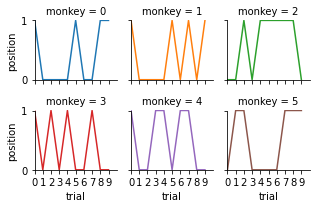

In [0]:
# create empty graphs for each monkey
grid = sns.FacetGrid(df, col="monkey", hue="monkey",
                     col_wrap=3, height=1.5)

# create line plot with trial on x-axis and position on y-axis for each monkey
grid.map(plt.plot, "trial", "position")

# set tick labels and positions
grid.set(xticks=np.arange(10), yticks=[0, 1],
         xlim=(0, 10), ylim=(0, 1))

# final adjustments
grid.fig.tight_layout()

In the figure above, a flat line across the majority of trials indicates that a monkey is repeatedly selecting the same square, suggesting that he may not understand the given task. If this is the case, the researcher knows changes will need to be made to the experimental design.

Seaborn is a very useful package for displaying information in a meaningful and aesthetic way. Whether you are visualizing the results of a scientific experiment or creating an out-of-the-box data science project, this package allows you to make something attractive and statistically informative very efficiently.

**Erin:**

In my Capstone class, we are working with public procurement data from Colombia. The data details information about each project, including project number, initial year, additional days, additional money, type of contract, and city of origin.  Identifying and visualizing patterns within the data are a very important step in this project prior to creating a model to predict which projects are more prone to inefficiencies as measured in additional money and additional days. The data used in the project is confidential, however, a sample of data has been created for the purpose of this demonstration. 

The pandas package is very useful for filterinig the data. For example, if I wanted to filter the data by a distinct year I would run the following code:

In [0]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import data
url = 'https://raw.githubusercontent.com/ekoreil/datascience350/master/ColombiaData.csv'
df = pd.read_csv(url, error_bad_lines=False)
#view data
print(df)
#filtering by initial year of contract
year_2011 = df['Anio Incio']==2011
print(year_2011)


   Projecto  Anio Incio  ... Dias Adiciones        Ciudad
0  12910101        2011  ...             43        Bogota
1  91929292        2011  ...             52      Medellin
2  12019292        2009  ...             22     Cartagena
3  84848484        2000  ...             99        Bogota
4  20921092        2017  ...             42          Cali
5  92901921        2004  ...             83        Bogota
6  93093214        2009  ...             56     Cartagena
7  49484834        2014  ...             91  Barranquilla
8  32039322        2020  ...             82      Medellin
9  58483920        2019  ...             16          Cali

[10 rows x 6 columns]
0     True
1     True
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Anio Incio, dtype: bool


This gives us all projects that were initiaited in the year 2011. This is an important year because it is when Colombia revamped both their e-public procurement process, and the way in which they collected data on their projects. Thus, a more useful filter would be to view all projects initiated on or after 2011:

In [0]:
#filtering by initial year of contract
onafteryear_2011 = df['Anio Incio']>=2011
print(onafteryear_2011)

0     True
1     True
2    False
3    False
4     True
5    False
6    False
7     True
8     True
9     True
Name: Anio Incio, dtype: bool


We are also interested in looking at patterns in where the projects are being done. We can filter by city to investigate this:

In [0]:
bogota_reponses = df['Ciudad'] == "Bogota"
print(bogota_reponses)

0     True
1    False
2    False
3     True
4    False
5     True
6    False
7    False
8    False
9    False
Name: Ciudad, dtype: bool


Quick visualizations are useful to check whether or not it is worth pursuing a relationshiip between two variables in our project. As Hayley has shown above, the package Matplotlib is useful for creating fast and easy plots:

Text(0.5, 1.0, 'Valor Adiciones vs. Dias Adiciones en Projectos en Colombia')

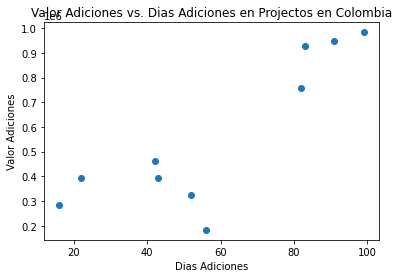

In [0]:
#basic plot
fig, ax = plt.subplots()
plot = ax.scatter(
    df["Dias Adiciones"],
    df["Valor Adiciones"],
    )
ax.set_xlabel("Dias Adiciones")
ax.set_ylabel("Valor Adiciones")
ax.set_title("Valor Adiciones vs. Dias Adiciones en Projectos en Colombia")

As we can see above, there does seem to be a postitivec correlation between Valor Adiciones and Dias Adiciones. Thus, we should push this along to some kind of regression or other modeling analysis. 

Pandas and Matplotlib are both very useful tools within Python. Both include logical language and commands, reminisent of dplyr and ggplot in R. This intiutive nature of the langauge makes it easy to learn and apply to large datasets. 